In [20]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier

### Генерация выборки

In [42]:
data = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0,
                           n_classes=3, n_clusters_per_class=1)

In [43]:
X = data[0]
y = data[1]

### Визуализация kNN для разных k

In [5]:
import matplotlib.pyplot as plt
%matplotlib notebook

k = 2
density = 30

In [21]:
def visualise_set(X, y, k, density):
    ax = plt.figure().add_subplot(111)
    colors = ['r', 'b', 'g', 'y', 'bl']
    for i in range(len(np.unique(y))):
        ax.scatter(X[y == i][:, 0], X[y == i][:, 1], color=colors[i])
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X, y)
    x_ax = np.linspace(np.min(X[:, 0]) - 1, np.max(X[:, 0]) + 1, density)
    y_ax = np.linspace(np.min(X[:, 1]) - 1, np.max(X[:, 1]) + 1, density)
    dens_x = x_ax[1]-x_ax[0]
    dens_y = y_ax[1]-y_ax[0]
    grid = np.transpose([np.tile(x_ax, len(y_ax)), np.repeat(y_ax, len(x_ax))])
    labels = classifier.predict(grid)
    for i in range(len(grid)):
        ax.fill_between([grid[i][0] - dens_x/2, grid[i][0] + dens_x/2],
                        [grid[i][1] - dens_y/2, grid[i][1] - dens_y/2],
                        [grid[i][1] + dens_y/2, grid[i][1] + dens_y/2], color=colors[labels[i]], alpha=0.2)
    plt.show()

<IPython.core.display.Javascript object>


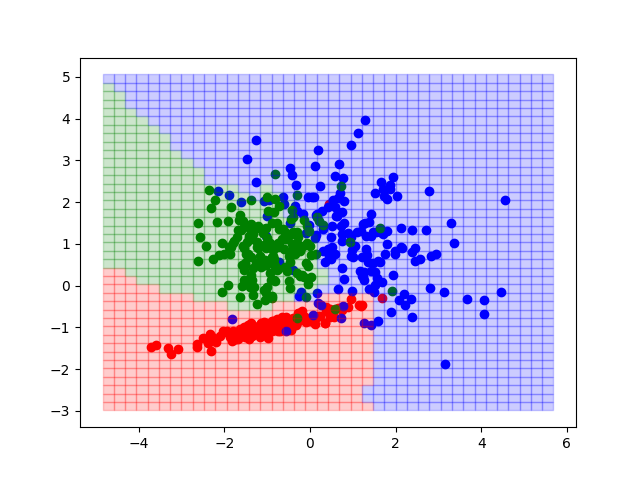

In [44]:
visualise_set(X, y, 10, 40)

<IPython.core.display.Javascript object>


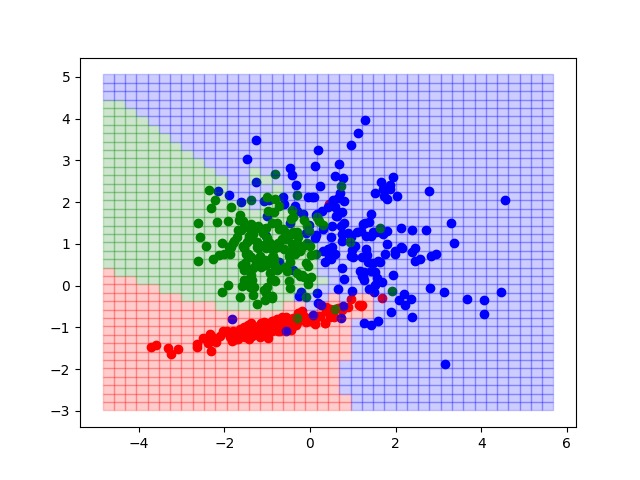

In [45]:
visualise_set(X, y, 5, 40)

<IPython.core.display.Javascript object>


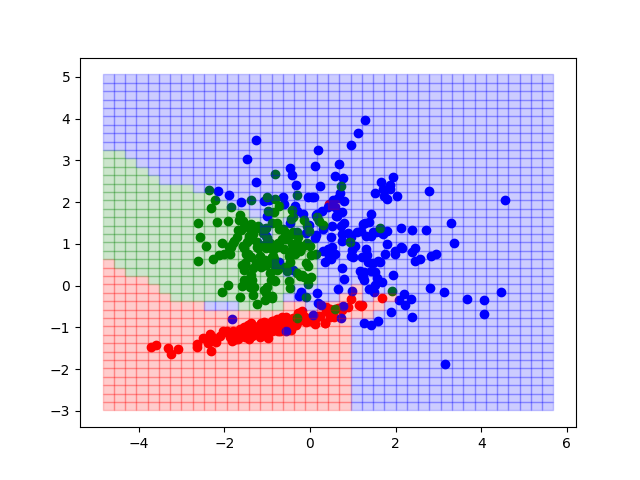

In [46]:
visualise_set(X, y, 2, 40)

<IPython.core.display.Javascript object>


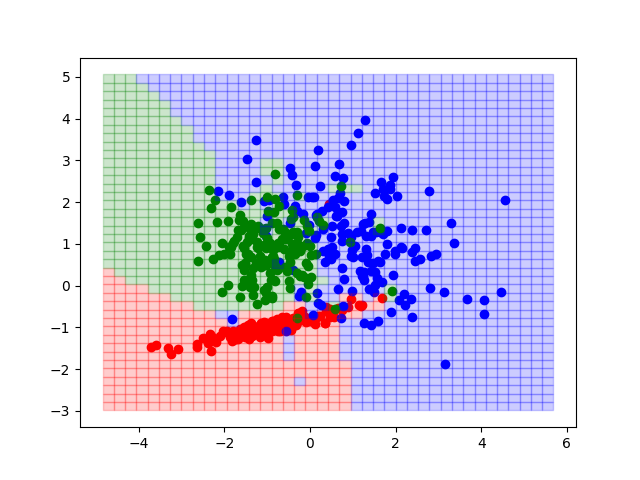

In [47]:
visualise_set(X, y, 1, 40)

### Зависимость accuracy от k

In [48]:
from sklearn.cross_validation import cross_val_score

def get_score(k, X, y):
    est = KNeighborsClassifier(n_neighbors=k)
    return cross_val_score(est, X, y, scoring='accuracy')

In [49]:
a = [[0, 1, 2],
     [2, 3, 4]]
get_score(2, X, y)

array([ 0.8502994,  0.8502994,  0.8373494])

<IPython.core.display.Javascript object>


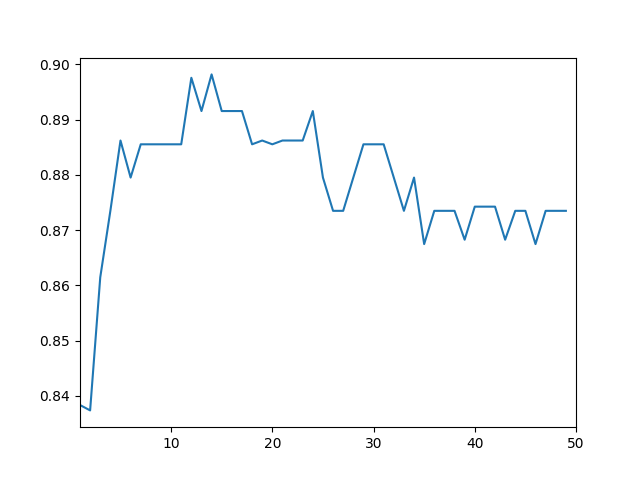

In [50]:
ax = plt.figure().add_subplot(111)
max_k = 50
plt.xlim((1, max_k))
k_s = np.arange(1, max_k)
ax.plot(k_s, map(lambda k: np.min(get_score(k, X, y)), k_s))
plt.show()